## Data splitting based on curvature change

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_excel('data.xlsx')

In [40]:
df.columns =['Temp', 'k']

In [41]:
df.head(10)

,Temp,k
0,494.70,0.04
1,988.89,0.06
2,1407.90,0.12
3,1826.40,0.15
4,2130.97,0.19
5,2397.57,0.23
6,2627.75,0.33
7,2705.77,0.43
8,2821.77,0.52
9,2861.56,0.61


In [15]:
len(df)

180

In [157]:
s=[]
s.append(0) 
for i in range(len(df)-1):
    s.append((df.k[i+1]-df.k[i])/(df.Temp[i+1]-df.Temp[i]))
 

p=[]
p.append(0) 
for i in range(len(df)-1):
    p.append(df.slop[i]*df.slop[i+1]) 
#p.append(0) 

In [158]:
len(p)

180

In [159]:
df['slop']=s

In [160]:
df['p']=p

In [161]:
b=[]
for i in p:
    if i<=0:
        b.append(0) 
    else:
        b.append(1) 


In [162]:
df['b']=b

In [163]:
b.index(0)

0

In [164]:
indices = []
for idx, value in enumerate(b):
    if value == 0:
        indices.append(idx)

In [165]:
#indices

In [166]:
# Using enumerate to Find Index Positions
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

In [167]:
indices=find_indices(b, 0)

In [168]:
len(indices)

31

In [169]:
#indices

In [170]:
gap=[]
gap.append(0) 
for i in range(30):
    gap.append(indices[i+1] -indices[i])
   

In [171]:
df2 = pd.DataFrame()
df2['indices']=indices
df2['gap']=gap

In [189]:
df.head(5)

,Temp,k,slop,p,b
0,494.70,0.04,0.000000,0.000000e+00,0
1,988.89,0.06,0.000040,0.000000e+00,0
2,1407.90,0.12,0.000143,5.795126e-09,1
3,1826.40,0.15,0.000072,1.026485e-08,1
4,2130.97,0.19,0.000131,9.414530e-09,1


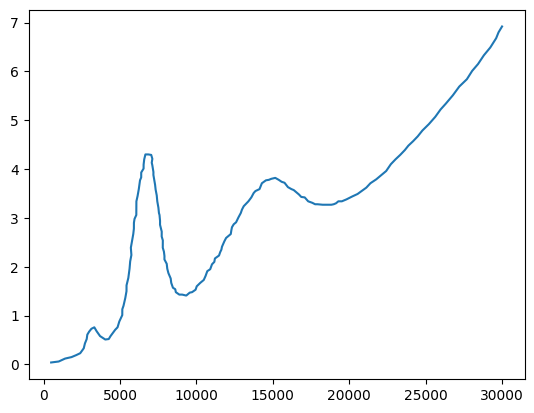

In [54]:
x=df.Temp
y=df.k
plt.plot(x,y)

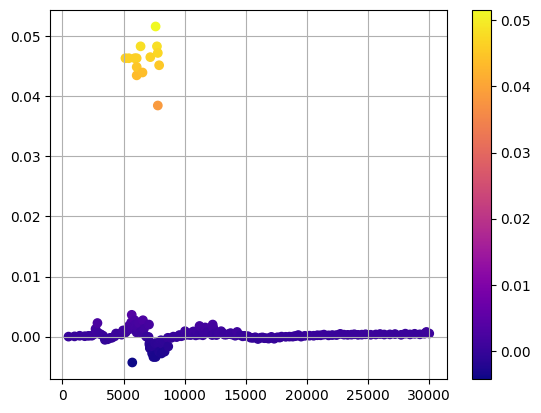

In [192]:
x =df.Temp
y1 =df.slop
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x, y1, c=y1, cmap='plasma')
#plt.plot(x,y1)
# visualizing the mapping from values to colors
plt.colorbar()
plt.grid()
# visualizing the plot using plt.show() function
plt.show()

## Now splitting

In [173]:
df2

,indices,gap
0,0,0
1,1,1
2,13,12
3,17,4
4,33,16
5,34,1
6,53,19
7,54,1
8,56,2
9,57,1


In [203]:
indices2=[]
indices2.append(0)
for i in range (len(gap)):
    if gap[i]>3:
        indices2.append(indices[i])
       

In [204]:
indices2

[0, 13, 17, 33, 53, 70, 88, 128, 141, 180]

In [206]:
for i in range (0,len(indices2),2):
    #print(i)
    print(indices2[i])

0
17
53
88
141


In [209]:
a = {}
k = 0
for i in range (len(indices2)-1):
    k=k+1
    a[i]=df.iloc[indices2[i]:indices2[i+1]]

In [211]:
for i in range(k):
    display(a[i])

,Temp,k,slop,p,b
0,494.70,0.04,0.000000,0.000000e+00,0
1,988.89,0.06,0.000040,0.000000e+00,0
2,1407.90,0.12,0.000143,5.795126e-09,1
3,1826.40,0.15,0.000072,1.026485e-08,1
4,2130.97,0.19,0.000131,9.414530e-09,1
5,2397.57,0.23,0.000150,1.970483e-08,1
6,2627.75,0.33,0.000434,6.518269e-08,1
7,2705.77,0.43,0.001282,5.568349e-07,1
8,2821.77,0.52,0.000776,9.944400e-07,1
9,2861.56,0.61,0.002262,1.754903e-06,1


,Temp,k,slop,p,b
13,3470.70,0.68,-0.000533,-8.387868e-08,0
14,3696.47,0.58,-0.000443,2.361027e-07,1
15,3885.31,0.54,-0.000212,9.382094e-08,1
16,4036.69,0.51,-0.000198,4.197771e-08,1


,Temp,k,slop,p,b
17,4264.79,0.52,0.000044,-8.688153e-09,0
18,4380.01,0.58,0.000521,2.282959e-08,1
19,4571.44,0.66,0.000418,2.176223e-07,1
20,4686.66,0.71,0.000434,1.813519e-07,1
21,4839.59,0.76,0.000327,1.418794e-07,1
22,4956.11,0.88,0.001030,3.367116e-07,1
23,5148.83,1.01,0.000675,6.947001e-07,1
24,5151.42,1.13,0.046332,3.125346e-05,1
25,5228.93,1.20,0.000903,4.184290e-05,1
26,5346.22,1.36,0.001364,1.231968e-06,1


,Temp,k,slop,p,b
33,5710.28,2.39,-0.004303,-0.000007,0
34,5789.34,2.53,0.001771,-0.000008,0
35,5868.40,2.67,0.001771,0.000003,1
36,5908.71,2.78,0.002729,0.000005,1
37,5911.30,2.90,0.046332,0.000126,1
38,5951.09,2.98,0.002011,0.000093,1
39,6066.57,3.06,0.000693,0.000001,1
40,6069.16,3.18,0.046332,0.000032,1
41,6071.23,3.27,0.043478,0.002014,1
42,6072.79,3.34,0.044872,0.001951,1


,Temp,k,slop,p,b
53,6853.01,4.30,0.000000,0.000000e+00,0
54,7042.62,4.29,-0.000053,-0.000000e+00,0
55,7117.02,4.21,-0.001075,5.670950e-08,1
56,7077.23,4.13,0.002011,-2.161888e-06,0
57,7114.16,4.08,-0.001354,-2.722117e-06,0
58,7150.58,4.01,-0.001922,2.602249e-06,1
59,7187.00,3.94,-0.001922,3.694164e-06,1
60,7185.71,3.88,0.046512,-8.939632e-05,0
61,7222.13,3.81,-0.001922,-8.939632e-05,0
62,7295.22,3.68,-0.001779,3.418562e-06,1


,Temp,k,slop,p,b
70,7619.37,2.86,0.051613,-1.750579e-04,0
71,7730.18,2.72,-0.001263,-6.520897e-05,0
72,7728.11,2.62,0.048309,-6.103497e-05,0
73,7802.24,2.54,-0.001079,-5.213455e-05,0
74,7799.91,2.43,0.047210,-5.094866e-05,0
75,7798.87,2.39,0.038462,1.815781e-03,1
76,7873.26,2.31,-0.001075,-4.136205e-05,0
77,7909.16,2.22,-0.002507,2.696022e-06,1
78,7907.61,2.15,0.045161,-1.132177e-04,0
79,8057.69,2.06,-0.000600,-2.708233e-05,0


,Temp,k,slop,p,b
88,9069.26,1.43,0.000000,-0.000000e+00,0
89,9334.56,1.41,-0.000075,-0.000000e+00,0
90,9563.71,1.47,0.000262,-1.973895e-08,0
91,9715.86,1.48,0.000066,1.720915e-08,1
92,9944.74,1.53,0.000218,1.435788e-08,1
93,10022.25,1.60,0.000903,1.972888e-07,1
94,10251.65,1.67,0.000305,2.755782e-07,1
95,10480.79,1.73,0.000262,7.990151e-08,1
96,10596.53,1.81,0.000691,1.809909e-07,1
97,10712.53,1.91,0.000862,5.958659e-07,1


,Temp,k,slop,p,b
128,15386.09,3.78,-0.000176,-1.324150e-08,0
129,15575.19,3.74,-0.000212,3.726386e-08,1
130,15764.54,3.72,-0.000106,2.234257e-08,1
131,15990.31,3.63,-0.000399,4.210571e-08,1
132,16217.38,3.59,-0.000176,7.022254e-08,1
133,16368.76,3.57,-0.000132,2.327350e-08,1
134,16519.88,3.53,-0.000265,3.497031e-08,1
135,16708.72,3.48,-0.000265,7.008322e-08,1
136,16859.58,3.43,-0.000331,8.775501e-08,1
137,17087.16,3.42,-0.000044,1.456337e-08,1


,Temp,k,slop,p,b
141,17919.49,3.28,0.000000,-0.000000e+00,0
142,18261.00,3.27,-0.000029,-0.000000e+00,0
143,18564.79,3.27,0.000000,-0.000000e+00,0
144,18830.61,3.27,0.000000,0.000000e+00,0
145,18982.77,3.28,0.000066,0.000000e+00,0
146,19135.19,3.30,0.000131,8.623579e-09,1
147,19287.86,3.34,0.000262,3.437909e-08,1
148,19515.71,3.34,0.000000,0.000000e+00,0
149,19820.54,3.38,0.000131,0.000000e+00,0
150,20201.58,3.44,0.000157,2.066250e-08,1


**I tried... Not perfect but i thing it will work...**

`Perfection is unattainable, but progress is perpetual.`